# Semiconductor Device Fundamentals Robert F.Pierret

 처음 colab 들어와 실행할 때 구문\
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks/Physics')

파일확인\
import os
os.listdir('/content/drive/MyDrive/ColabNotebooks/Physics')

변경된 파일 다시 로드\
import importlib
importlib.reload(constant)

In [1]:
# 처음 colab 들어와 실행할 때 구문.

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/ColabNotebooks/Physics')

Mounted at /content/drive


### 2. Carrier Modeling

EH : electron binding energy within the hydrogen atom
$$E_H=-\frac{m_0q^4}{2(4\pi\epsilon_0\hbar n)^2}=-\frac{13.6}{n^2}eV, n=1,2,3,...$$

In [2]:
#from constant import q,m0,e0,hbar,mn,e_si,k,kB
import numpy as np

m0 = 9.10938356e-31       # 전자 질량 (kg)
q = 1.602176634e-19       # 전자 전하 (C)
epsilon0 = 8.854187817e-12  # 진공 유전율 (F/m)
hbar = 1.054571817e-34    # h-bar (J·s)
eV = 1.602176634e-19      # 1 eV in J

for n in range(1,4):
    EH=-m0*q**4/(2*(4*np.pi*epsilon0*hbar*n)**2) #J
    E=EH/q #eV
    print([n],"%0.3f"%E,"eV")

[1] -13.606 eV
[2] -3.401 eV
[3] -1.512 eV


In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB
T=300
print(m0,q,e0,hbar,mn())
print(mn(T)*m0)
print(k*T)
print(kB*T/q)
print(k)

9.10938356e-31 1.602192e-19 8.85418e-14 1.05458e-34 1.1834900000000002
1.07808643494244e-30
0.025851
0.025851995266484913
8.617e-05


### fermi function
$$f(E)=\frac{1}{1+e^{(E-E_F)/kT}}$$

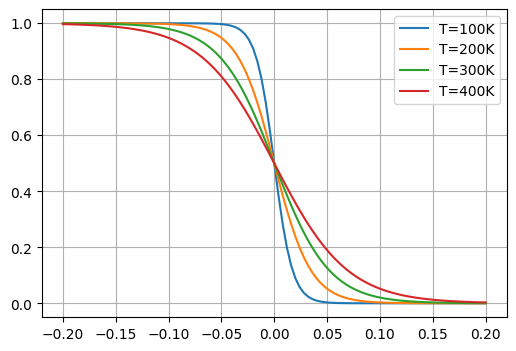

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from constant import q,m0,e0,hbar,mn,e_si,k,kB
Temp=[100,200,300,400]
DelE = np.linspace(-0.2, 0.2, 101)

plt.figure(figsize=(6,4))
for i in Temp:
    fE=1/(1+np.exp(DelE/(k*i)))
    plt.plot(DelE,fE,label=f'T={i}K')
plt.grid(), plt.legend()
plt.show()

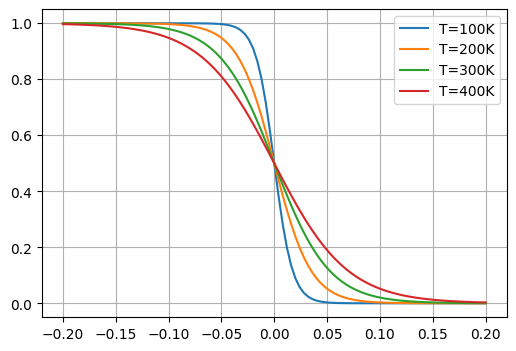

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from constant import q,m0,e0,hbar,mn,e_si,k,kB
Temp=[100,200,300,400]

DelE = np.linspace(-0.2, 0.2, 101)
def fermiE(DelE,Temp):
    return 1/(1+np.exp(DelE/(k*Temp)))

plt.figure(figsize=(6,4))
for i in Temp:
    fE=fermiE(DelE,i)
    plt.plot(DelE,fE,label=f'T={i}K')
plt.grid(), plt.legend()
plt.show()

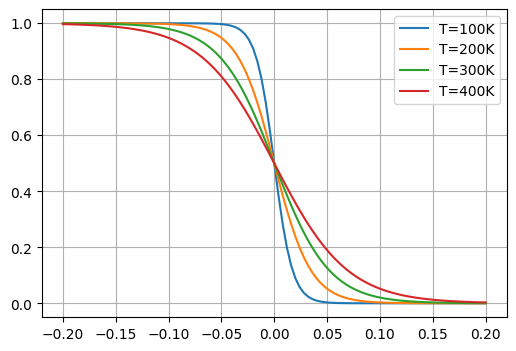

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from constant import q,m0,e0,hbar,mn,e_si,k,kB
Temp=[100,200,300,400]

DelE = np.linspace(-0.2, 0.2, 101)
fermiE = lambda DelE, Temp : 1/(1+np.exp(DelE/(k*Temp)))

plt.figure(figsize=(6,4))
for i in Temp:
    fE=fermiE(DelE,i)
    plt.plot(DelE,fE,label=f'T={i}K')
plt.grid(), plt.legend()
plt.show()

### effective density of status
$$N_C=2\left[\frac{m_n^*kT}{2\pi\hbar ^2}\right]^{3/2}$$
$$n_i=\sqrt{N_c N_v}exp\left(-\frac{E_G}{2kT}\right)$$

In [ ]:
#Barber [Solid state Electronics, 10, 1039(1967)]
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni
import numpy as np, matplotlib.pyplot as plt

T=375
print(T,mn(T),mp(T),Eg(T),Nc(T),Nv(T),ni(T),k)

375 1.213671875 0.8409062499999999 1.1042080860534125 4.689141115107678e+19 2.7043490251902046e+19 1517988996606.5085 8.617e-05


In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni
import numpy as np, matplotlib.pyplot as plt
T=375
ni=np.sqrt(Nc(T)*Nv(T))*np.exp(-(Eg(T)-0.00743)/(2*k*T))
print("%.3e"%ni)

1.518e+12


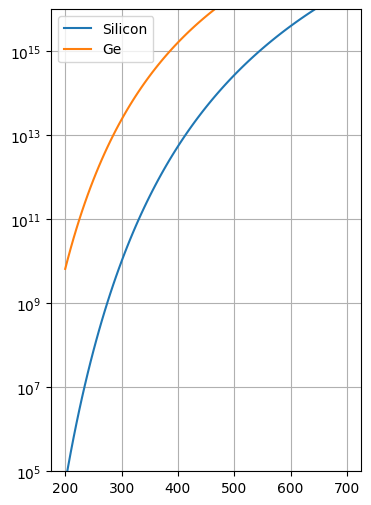

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,ni_Ge
import numpy as np, matplotlib.pyplot as plt

Temp = np.linspace(200, 700, 101)
#ni = np.sqrt(Nc(Temp)*Nv(Temp))*np.exp(-(Eg(Temp)-0.00743)/(2*k*Temp))
#Sproul and Green
ni_s=9.15e19*(Temp/300)**2*np.exp(-0.5928/(k*Temp))

plt.figure(figsize=(4,6))
plt.semilogy(Temp,ni(Temp), label="Silicon")
#plt.semilogy(Temp,ni_s, label="Silicon_s")
plt.semilogy(Temp,ni_Ge(Temp), label="Ge")
plt.ylim(1e5, 1e16)
plt.grid(), plt.legend()
plt.show()

### Determination of Fermi Energy
$$ Ei=\frac{Ec+Ev}{2}+\frac{kT}{2}ln\left(\frac{Nv}{Nc}\right)$$
$$ \frac{Nv}{Nc}=\left(\frac{m_p(T)}{m_n(T)}\right)^\frac{3}{2}$$
$$ Ei=\frac{Ec+Ev}{2}+\frac{3}{4}kT ln\left(\frac{m_p(T)}{m_n(T)}\right)$$
$$ EF-Ei=kTln(n/ni)=-kTln(p/ni), n=N_D, p=N_A$$
$$ EF-Ei=kTln(N_D/ni), N_D>N_A, N_D>ni$$
$$ Ei-EF=kTln(N_A/ni), N_A>N_D, N_A>ni$$

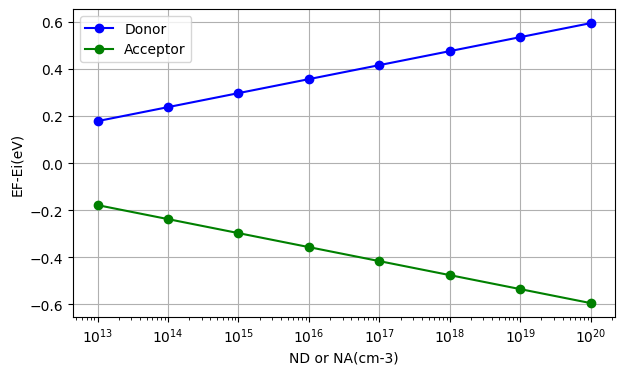

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni, mun, mup
import numpy as np, matplotlib.pyplot as plt

T=300
Ei=0
#Nconc=1e17
NB=np.logspace(13,20,8)
EFiD=k*T*np.log(NB/ni(T))
EFiA=-EFiD
plt.figure(figsize=(7,4))
plt.semilogx(NB,EFiD,"bo-", label="Donor")
plt.semilogx(NB,EFiA,"go-", label="Acceptor")
plt.xlabel("ND or NA(cm-3)"), plt.ylabel("EF-Ei(eV)")
plt.grid(), plt.legend()
plt.show()

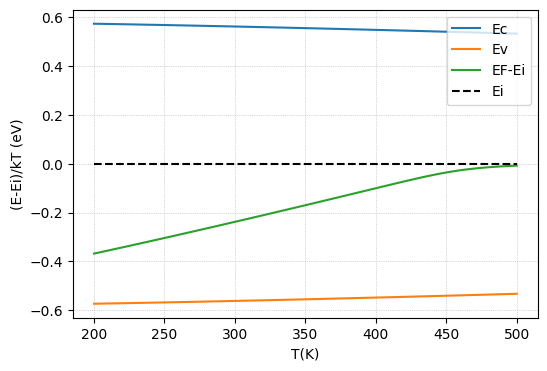

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni, mun, mup
import numpy as np, matplotlib.pyplot as plt
T=300
NA=1e14
Temp=np.linspace(200,500,101)
Eg=Eg(Temp)
#Eg=1.205-2.8e-4*Temp
Ei=0*Temp
ni=ni(Temp)
#ni=3.1e16*Temp**1.5*np.exp(-0.603/(k*Temp))
p=NA/2+np.sqrt((NA/2)**2+ni**2)
EFi=-k*Temp*np.log(p/ni)

plt.figure(figsize=(6,4))

plt.plot(Temp,Eg/2,label="Ec")
plt.plot(Temp,-Eg/2,label="Ev")
plt.plot(Temp,EFi,label="EF-Ei")
plt.plot(Temp,Ei,"k--",label="Ei")
plt.xlabel("T(K)"), plt.ylabel("(E-Ei)/kT (eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni, mun, mup
import numpy as np, matplotlib.pyplot as plt

# 공백을 기준으로 T와 농도를 넣어주어라.
# 만약 input에 숫자를 넣고 enter를 누른다. 만약 input을 넣지 않고 강제 종료하려면 Menu/Kernel/Interrupt Kernel를 누른다.
# 기존 변수가 기억되고 있으면, Menu/Kernel/Restart Kernel을 누른다.

T=int(input("temperature=")) #want to delet "input", Kernel/Interrupt Kernel
print(T,mn(T),mp(T),Eg(T),Nc(T),Nv(T),ni(T),k)

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni, mun, mup

# 공백을 기준으로 T와 농도를 넣어주어라.
# 만약 input에 숫자를 넣고 enter를 누른다. 만약 input을 넣지 않고 강제 종료하려면 Menu/Kernel/Interrupt Kernel를 누른다.
T, ND, NA = map(float, input("Temp(Kelvin) ND(cm^-3) NA(cm^-3)=").split())

Temp(Kelvin) ND(cm^-3) NA(cm^-3)= 300 1e16 1e17


In [ ]:
print(T,mn(T),mp(T),Eg(T),Nc(T),Nv(T),ni(T),k)

300.0 1.1834900000000002 0.80476 1.1245192307692307 3.230897945697407e+19 1.8116567819383775e+19 10004609206.989506 8.617e-05


In [ ]:
mun=mun(T,ND)
mup=mup(T,NA)
print(mun, mup)

In [ ]:
print(T, ND, NA)

In [ ]:
T

In [ ]:
ND

In [ ]:
NA

In [ ]:
mun(T,ND)

In [ ]:
mup(T,NA)

In [ ]:
mun(300, 1e17)

### Problem 2.1

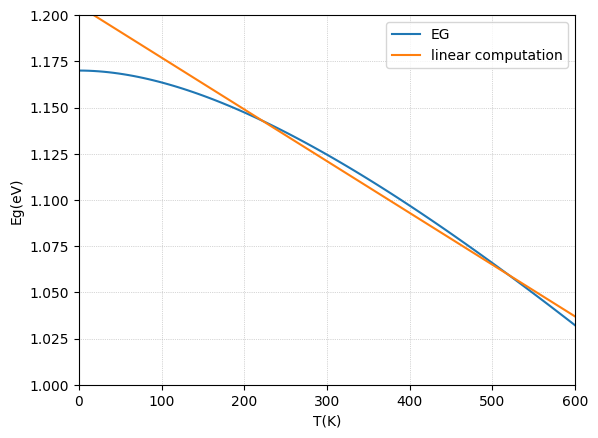

In [ ]:
# 2. Carrier modeling
# Problem 2.1
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

Temp=np.linspace(0,600,101)

Eg=Eg(Temp)

plt.plot(Temp,Eg,label="EG")
plt.plot(Temp, 1.205-2.8e-4*Temp, label="linear computation")
plt.xlim(0, 600), plt.ylim(1,1.2)
plt.xlabel("T(K)"), plt.ylabel("Eg(eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### Problem 2.9
$$electron\ distribution=g_c(E)f(E)=\frac{m_n^\ast \sqrt{2m_n^\ast}}{\pi^2 \hbar^3}\sqrt{E-E_c}\ e^{-(E-E_F)/{kT}}$$
$$\left(\frac{m_n^\ast \sqrt{2m_n^\ast}}{\pi^2\hbar^3}\ e^{-E_G/{4kT}}\right)\sqrt{E-E_c}\ e^{-(E-E_c)/{kT}}$$
$$hole\ distribution=g_v(E)[1-f(E)]=\frac{m_p^\ast \sqrt{2m_p^\ast}}{\pi^2 \hbar^3}\sqrt{E_v-E}\ e^{(E-E_F)/{kT}}$$
$$\left(\frac{m_p^\ast \sqrt{2m_p^\ast}}{\pi^2\hbar^3}\ e^{-3E_G/{4kT}}\right)\sqrt{E_v-E}\ e^{-(E_v-E)/{kT}}$$

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

print(Eg(),k*T,m0,mn(),mp(),hbar,q)

1.1245192307692307 0.025851 9.1095e-31 1.1834900000000002 0.80476 1.05458e-34 1.602192e-19


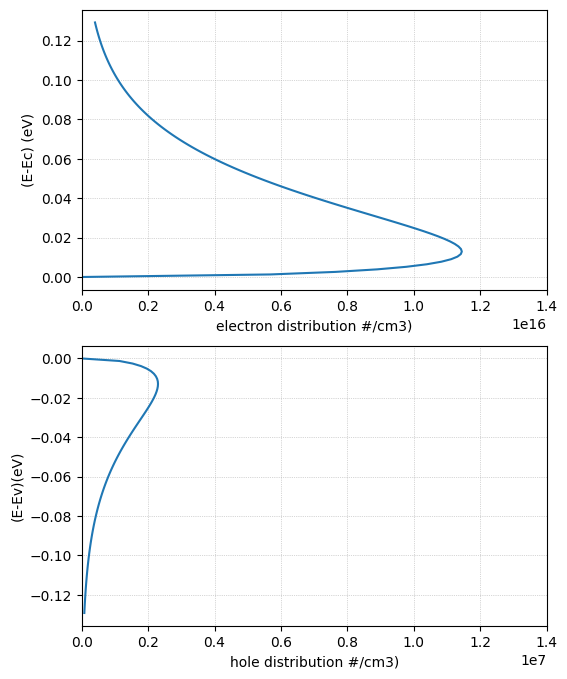

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
T=300
c1=q #Joules to eV, Joules=c1*eV
c2=1e-6 #m^3=c2*cm^3

deltaE=np.linspace(0,5*k*T,101)
A=m0*np.sqrt(2*m0)/(np.pi**2*hbar**3)
An=mn()**(3/2)*A; Ap=mp()**(3/2)*A;
e_dist=c1*c2*An*np.exp(-Eg()/(4*k*T))*np.sqrt(c1*deltaE)*np.exp(-deltaE/(k*T))
h_dist=c1*c2*Ap*np.exp(-3*Eg()/(4*k*T))*np.sqrt(c1*deltaE)*np.exp(-deltaE/(k*T))

plt.figure(figsize=(6,8))
plt.subplot(211)
#plt.plot(e_dist,deltaE/(k*T))
plt.plot(e_dist,deltaE)
plt.xlim(0, 1.4e16) ##, plt.ylim(0,5)
#plt.xlabel("electron distribution #/cm3)"), plt.ylabel("(E-Ec)/kT (eV)")
plt.xlabel("electron distribution #/cm3)"), plt.ylabel("(E-Ec) (eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.subplot(212)
#plt.plot(h_dist,-deltaE/(k*T))
plt.plot(h_dist,-deltaE)
plt.xlim(0, 1.4e7) #, plt.ylim(-5,0)
#plt.xlabel("hole distribution #/cm3)"), plt.ylabel("(E-Ev)/kT (eV)")
plt.xlabel("hole distribution #/cm3)"), plt.ylabel("(E-Ev)(eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.show()
#graph에 보듯이, Epeak=Ec+kT/2 영역에서 최대값을 갖는다.

$$n=\frac{ND-NA}{2}+\left[\left(\frac{ND-NA}{2}^2\right)+n_i^2\right]^{1/2}$$
$$p=\frac{n_i^2}{n}=\frac{NA-ND}{2}+\left[\left(\frac{NA-ND}{2}^2\right)+n_i^2\right]^{1/2}$$
$$ EF-Ei=kTln(n/ni)=-kTln(p/ni), n=ND, p=NA$$

In [ ]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
NA=1e16
ND=9e15
Nnet=ND-NA
ni=ni(T)
#print(Eg(300),mn(300),mp(300),ni(300))
if Nnet==0:
    n=ni
    p=ni
    EFi=0 #EF-Ei(eV)
elif Nnet>0:
    n=Nnet/2+np.sqrt((Nnet/2)**2+ni**2)
    p=ni**2/n
    EFi=k*T*np.log(n/ni)
else:
    p=-Nnet/2+np.sqrt((Nnet/2)**2+ni**2)
    n=ni**2/p
    EFi=-k*T*np.log(p/ni)

print(f"T={T},NA={NA:.2e},ND={ND:.2e},ni={ni:.2e},n={n:.2e},p={p:.2e},EF-Ei={EFi:.3e}")

T=300,NA=1.00e+16,ND=9.00e+15,ni=1.00e+10,n=1.00e+05,p=1.00e+15,EF-Ei=-2.976e-01
